# Machine learning with a Heart

Kernel status: In progress

- [X] Analysis
- [ ] Cleaning

## About 

In the United States, the Centers for Disease Control and Prevention is a good resource for information about heart disease. According to their website:

- About 610,000 people die of heart disease in the United States every year–that’s 1 in every 4 deaths.
- Heart disease is the leading cause of death for both men and women. More than half of the deaths due to heart disease in 2009 were in men.
- Coronary heart disease (CHD) is the most common type of heart disease, killing over 370,000 people annually.
- Every year about 735,000 Americans have a heart attack. Of these, 525,000 are a first heart attack and 210,000 happen in people who have already had a heart attack.
- Heart disease is the leading cause of death for people of most ethnicities in the United States, including African Americans, Hispanics, and whites. For American Indians or Alaska Natives and Asians or Pacific Islanders, heart disease is second only to cancer.
For more information, you can look at the website of the Centers for Disease Control and Prevention: [preventing heart disease](https://www.cdc.gov/heartdisease/prevention.htm)

## Objective

Your goal is to predict the binary class `heart_disease_present`, which represents whether or not a patient has heart disease

## Evaluation metric

>Log Loss

## Dependencies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from warnings import filterwarnings

filterwarnings('ignore')

%matplotlib inline

## Data understanding

In [2]:
train_X = pd.read_csv('./data/train_values.csv')
train_y = pd.read_csv('./data/train_labels.csv')
test_X = pd.read_csv('./data/test_values.csv')
# path = '../input/warm-up-machine-learning-with-a-heart/'
# train_X = pd.read_csv(path+'train_values.csv')
# train_y = pd.read_csv(path+'train_labels.csv')
# test_X = pd.read_csv(path+'test_values.csv')

print(train_X.shape,train_X.columns,'\n\n')

print(test_X.shape,test_X.columns)

(180, 14) Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object') 


(90, 14) Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')


In [3]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
patient_id                              90 non-null object
slope_of_peak_exercise_st_segment       90 non-null int64
thal                                    90 non-null object
resting_blood_pressure                  90 non-null int64
chest_pain_type                         90 non-null int64
num_major_vessels                       90 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    90 non-null int64
resting_ekg_results                     90 non-null int64
serum_cholesterol_mg_per_dl             90 non-null int64
oldpeak_eq_st_depression                90 non-null float64
sex                                     90 non-null int64
age                                     90 non-null int64
max_heart_rate_achieved                 90 non-null int64
exercise_induced_angina                 90 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 9.2+ KB


There are no null values in the dataset so we can skip the `null value treatment`.

Let us now prepare the dataset for analysis.

In [4]:
target = 'heart_disease_present'
X = train_X.iloc[:,1:]
X_t = test_X.iloc[:,1:]
y = train_y[target]
test_ids = test_X['patient_id']

print(X.shape, y.shape)
print(X_t.shape,test_ids.shape)
data = pd.concat([X,y],axis=1)
print(data.shape)

(180, 13) (180,)
(90, 13) (90,)
(180, 14)


## Dependent variable analysis

0    100
1     80
Name: heart_disease_present, dtype: int64


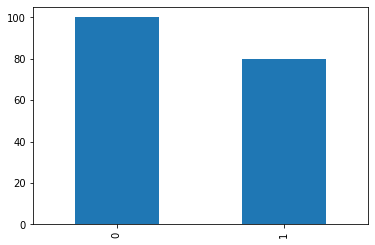

In [5]:
# The data is not highly imbalanced
print(y.value_counts())
ax = y.value_counts().plot.bar()

## Univariate analysis

- In this stage, we check features one by one to using various statistical measures and visualizations.
- As part of the analysis, we can highlight the missing and outlier values in the feature.

In [6]:
print(len(X.columns),'\n',X.nunique().sort_values())

13 
 fasting_blood_sugar_gt_120_mg_per_dl      2
sex                                       2
exercise_induced_angina                   2
slope_of_peak_exercise_st_segment         3
thal                                      3
resting_ekg_results                       3
chest_pain_type                           4
num_major_vessels                         4
oldpeak_eq_st_depression                 34
resting_blood_pressure                   36
age                                      40
max_heart_rate_achieved                  73
serum_cholesterol_mg_per_dl             118
dtype: int64


### Numerical columns

In [7]:
num_cols = "oldpeak_eq_st_depression resting_blood_pressure age max_heart_rate_achieved serum_cholesterol_mg_per_dl".split()
print(len(num_cols),num_cols)

5 ['oldpeak_eq_st_depression', 'resting_blood_pressure', 'age', 'max_heart_rate_achieved', 'serum_cholesterol_mg_per_dl']


In case of continuous variables, we need to understand the `central tendency` and `spread` of the variable.

> Density plot, histogram, box plot,etc can be used for visualization.

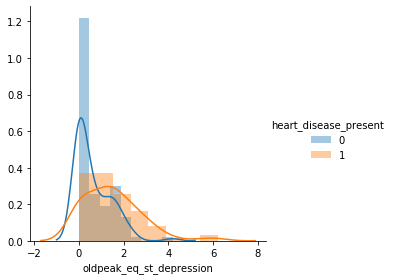

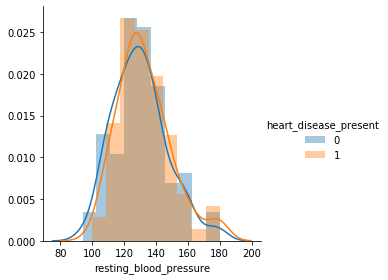

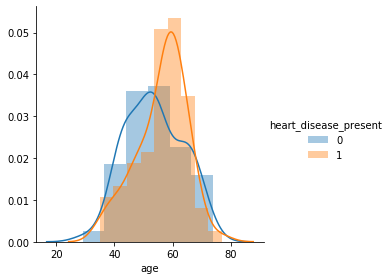

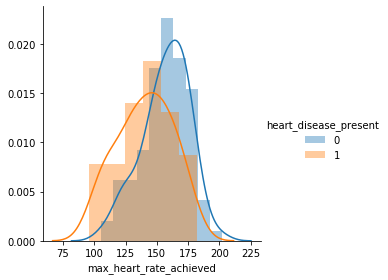

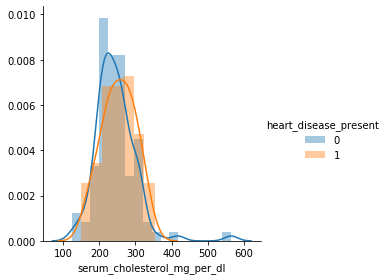

In [8]:
for col in num_cols:
    sns.FacetGrid(data,hue=target,height=4)\
    .map(sns.distplot,col)\
    .add_legend()
plt.show()

oldpeak_eq_st_depression : 1.01 0.8 [0.]
oldpeak_eq_st_depression skewness : 1.5074124471085

resting_blood_pressure : 131.3111111111111 130.0 [130]
resting_blood_pressure skewness : 0.6570798993636248

age : 54.81111111111111 55.0 [54]
age skewness : -0.19916557103159252

max_heart_rate_achieved : 149.48333333333332 152.0 [162]
max_heart_rate_achieved skewness : -0.3937048051980345

serum_cholesterol_mg_per_dl : 249.2111111111111 245.5 [204]
serum_cholesterol_mg_per_dl skewness : 1.2739315506526112



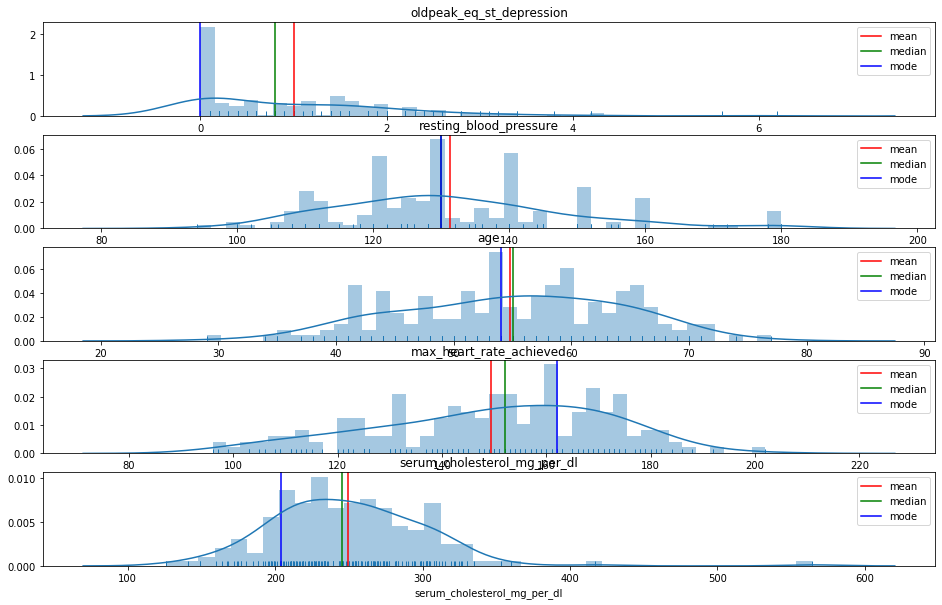

In [9]:
n = len(num_cols)
plt.figure(figsize=(16,10))
for i,col in enumerate(num_cols,1):
    plt.subplot(n,1,i)
    mean,median,mode = np.mean(X[col]),np.median(X[col]),stats.mode(X[col])[0]
    print(col,':',mean,median,mode)
    print(col,'skewness :',X[col].skew());print()

    plt.axvline(mean,color='r',label='mean')
    plt.axvline(median,color='g',label='median')
    plt.axvline(mode,color='b',label='mode')
    plt.title(col)
    sns.distplot(X[col],bins=40,rug=True)
    plt.legend()
    
plt.show()

Skewness can be seen in `oldpeak_eq_st_depression` and `serum_cholesterol_mg_per_dl`

#### Outlier check

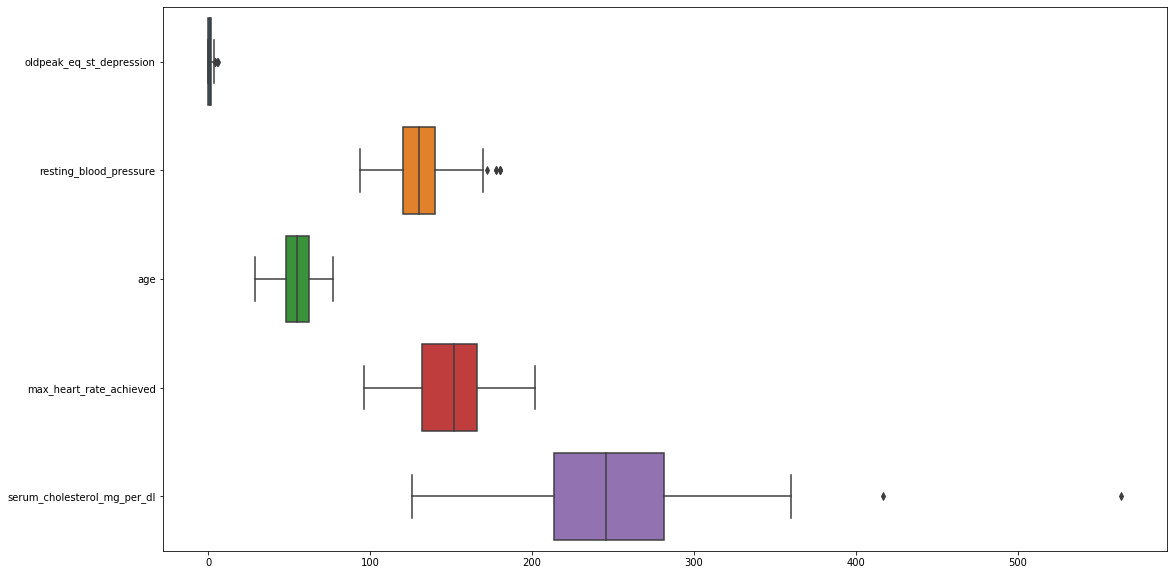

In [10]:
# Global figsize
plt.rcParams['figure.figsize'] = 9,5
# Local figsize
plt.figure(figsize=(18,10))

ax = sns.boxplot(data=X[num_cols],orient='h')

Outliers found in `oldpeak_eq_st_depression`, `resting_blood_pressure` and `serum_cholesterol_mg_per_dl`.

### Categorical columns

In [11]:
cat_cols = """fasting_blood_sugar_gt_120_mg_per_dl sex exercise_induced_angina 
slope_of_peak_exercise_st_segment thal resting_ekg_results chest_pain_type num_major_vessels""".split()
print(cat_cols)

['fasting_blood_sugar_gt_120_mg_per_dl', 'sex', 'exercise_induced_angina', 'slope_of_peak_exercise_st_segment', 'thal', 'resting_ekg_results', 'chest_pain_type', 'num_major_vessels']


For categorical variables, frequency table can be used to understand distribution of each category. 

Try to measure Count and Count% against each category. 

>Bar chart, Count plot can be used for visualization.

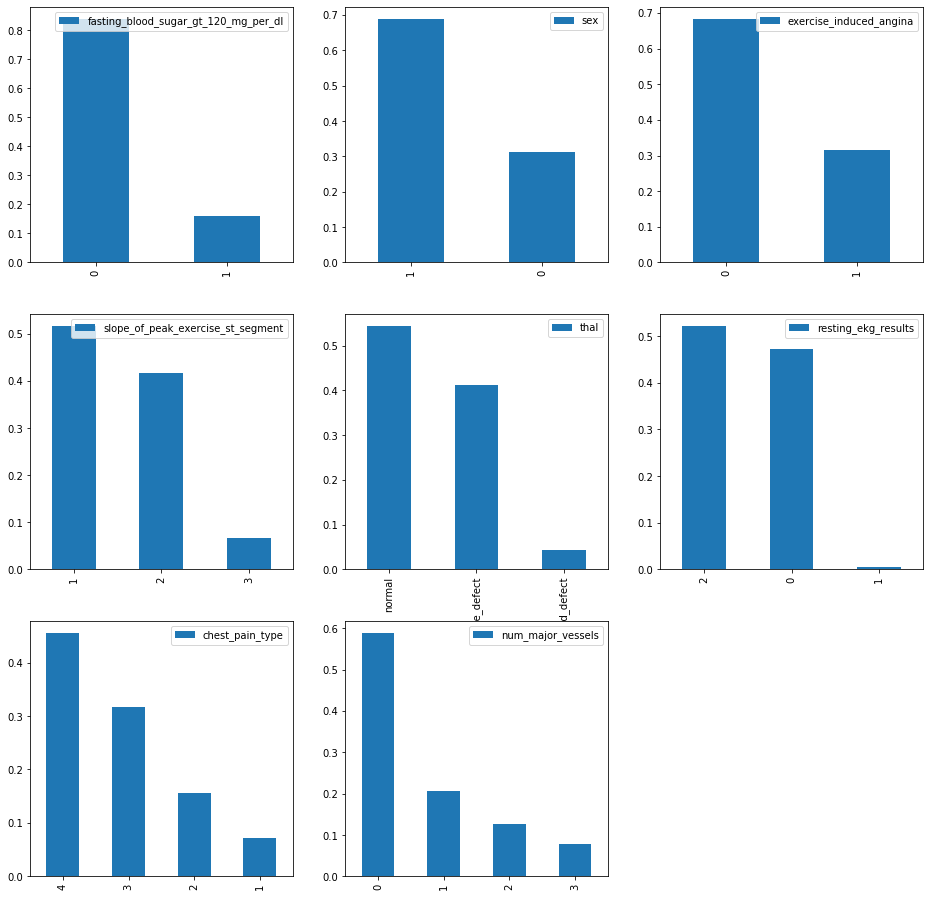

In [12]:
plt.figure(figsize=(16,16))
for i,col in enumerate(cat_cols,1):
    plt.subplot(3,3,i)
    X[col].value_counts(normalize=True).plot.bar()
    plt.legend()

## Bivariate analysis

### Continuous & Categorical

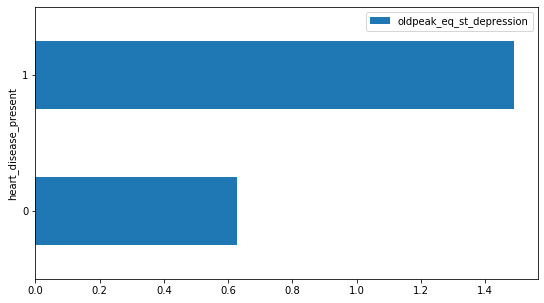

In [ ]:
# mean value of numerical columns with respect to target
for col in num_cols:
    mean_per_cat = pd.pivot_table(data,values=col,index=target,aggfunc="mean")
    ax = mean_per_cat.plot.barh()
plt.show()

From the above diagram, we can see that people having heart disease:
- Mean value is variably more for columns oldpeak_eq_st_depression and age.
- It is lesser for people with smaller max_heart_rate_achieved.
- For other columns the values are not much different.

### Categorical & Categorical

In [ ]:
n_cat_cols = len(cat_cols)
fig,ax = plt.subplots(n_cat_cols,1,figsize=(10,6*n_cat_cols))
for i,col in enumerate(cat_cols):
    # Create a cross table for stacked graph
    ct = pd.crosstab(data[col],data[target],normalize="index")
    ct.plot.barh(stacked=True,ax=ax[i])
    
plt.show()

Key takeaways from the above chart are :

- Columns which show positive relationship with heart disease
    - `sex`: Males are more likely.
    - `exercise_induced_angina`: If they are having angina
    - `slope_of_peak_exercise_st_segment`: If the quality of blood flow is of type 2 or 3
    - `thal`: people with reversible defect and fixed defect
    - `resting_ekg_results`: 100% of people of type 1 show issues.
    - `chest_pain_type`: Type 4 is most concering
    - `num_major_vessels` Direct proportionality with the target (as the number increase chance also increase)
- *No or not much significance column*: fasting_blood_sugar_gt_120_mg_per_dl



## Multivariate analysis

### Pair plot

In [ ]:
sns.pairplot(data,hue=target)

### Heat map

In [ ]:
# Correlation of numerical features and target
plt.figure(figsize=(10,10))
with sns.axes_style("dark"):
    cor = data.loc[:,num_cols+[target]].corr()
    sns.heatmap(cor,annot=True,square=True,fmt='.2f',vmax=.8,cmap="YlGnBu")

## Data Cleaning

While preparing the columns(like encoding a columns) make sure to reflect that in test data too.

### Preparing numerical columns

In [ ]:
outliers_num_cols = ['oldpeak_eq_st_depression','resting_blood_pressure','serum_cholesterol_mg_per_dl']
color = 'brown'
# oldpeak_eq_st_depression
# ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
# 3 outliers
plt.figure(figsize=(16,10))
plt.subplot(231)
ax = sns.boxplot(data=X,x='oldpeak_eq_st_depression')
plt.subplot(234)
ax1 = sns.distplot(X['oldpeak_eq_st_depression'],rug=True,rug_kws={'color':color,'alpha':0.5})

# resting_blood_pressure
# The outlier in the data could be because of abnormal heart conditon so we will not remove this one.
plt.subplot(232)
ax = sns.boxplot(data=X,x='resting_blood_pressure')
plt.subplot(235)
ax1 = sns.distplot(X['resting_blood_pressure'],rug=True,rug_kws={'color':color,'alpha':0.5})

# serum_cholesterol_mg_per_dl
plt.subplot(233)
ax = sns.boxplot(data=X,x='serum_cholesterol_mg_per_dl')
plt.subplot(236)
ax1 = sns.distplot(X['serum_cholesterol_mg_per_dl'],rug=True,rug_kws={'color':color,'alpha':0.5})

**Outlier treatment**

1. Replace with NaN and fill with another value.
2. Remove values
3. Log transformation (Changes skewness)

In [ ]:
# Method 1

for col_name in outliers_num_cols:
    q1 = X[col_name].quantile(q=0.25)
    q3 = X[col_name].quantile(q=0.75)

    lower_limit = q1 - (q3-q1)*1.5
    upper_limit = q3 + (q3-q1)*1.5
    X[col_name].loc[(X[col_name] < lower_limit) | (X[col_name] > upper_limit)] = np.NaN

    X[col_name].fillna(method="ffill",inplace=True)
    X[col_name].fillna(method="bfill",inplace=True)
 
# Columns after outlier treatment
plt.figure(figsize=(16,5))
for i,col_name in enumerate(outliers_num_cols,1):
    plt.subplot(1,3,i)
    ax = sns.boxplot(data=X,x=col_name)

In [ ]:
# Method 2
# Train dataset
# for col_name in num_cols:
#     q1 = X[col_name].quantile(q=0.25)
#     q3 = X[col_name].quantile(q=0.75)

#     lower_limit = q1 - (q3-q1)*1.5
#     upper_limit = q3 + (q3-q1)*1.5
#     mask = ( X[col_name] >= lower_limit) & (X[col_name] <= upper_limit)
#     X = X.loc[mask]
#     y = y.loc[mask]
    
# print(X.shape)
# print(X[num_cols].describe())

#### 2. Scaling the values

**Normalization** is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks

**Standardization** assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian. Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

In [ ]:
#Standardizing - Train
# scaler = StandardScaler()
# for col_name in num_cols:
#       X[col_name] = scaler.fit_transform(X[col_name].values.reshape(-1,1))     

In [ ]:
#Standardizing - Test
# scaler = StandardScaler()
# for col_name in num_cols:
#       X_t[col_name] = scaler.fit_transform(X_t[col_name].values.reshape(-1,1))     

### Preparing Categorical columns

In [ ]:
X[cat_cols].info()

`thal` is a categorical column of type object, we will encode it to numerical value.

In [ ]:
X = pd.get_dummies(data=X,columns=['thal'],drop_first=True)
X_t = pd.get_dummies(data=X_t,columns=['thal'],drop_first=True)

## Feature engineering

### Feature importance

In [ ]:
# model = RandomForestClassifier(random_state=1,max_depth=3, n_estimators=41).fit(X,y)
# pred_test = model.predict(X)
# score = accuracy_score(y,pred_test)

# importances=pd.Series(clf.feature_importances_, index=X.columns).sort_values() 
# importances.plot(kind='barh', figsize=(12,8))

### Feature/Variable Transformation

### Feature creation

- Creating Dummy variable 
- Derived variables/features

### Experiment: PCA for reducing number of columns

In [ ]:
# Finding the right number of components
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components/columns')
plt.ylabel('Cumulative explained variance')

# n = 3, it the point where the explained variance stops growing
n = 3

# Fit and transform on Train data
pca = PCA(n_components=n).fit(X)
X_pca = pca.transform(X)

In [ ]:
# Transformation on test data
X_t_pca = pca.transform(X_t)

## Output

In [ ]:
# output the cleaned/tranformed and train and test dataset
train_data = pd.concat((X,y),axis=1)
test_data = X_t

train_data_pca = pd.concat((pd.DataFrame(X_pca),y),axis=1)
test_data_pca = pd.DataFrame(X_t_pca)

In [ ]:
train_data.to_csv('train.csv',index=False)
test_data.to_csv('test.csv',index=False)

train_data_pca.to_csv('train_pca.csv',index=False)
test_data_pca.to_csv('test_pca.csv',index=False)

**References**
- [Analytics vidhya - Data exploration](https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#three)
- [Towards datascience - PCA](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)